In [42]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from matplotlib import rc

In [53]:
warnings.filterwarnings('ignore')
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 확률분포

'우리가 분석할 데이터는 어떤 확률변수로부터 실현된 표본'이라는 가정이 데이터 분석의 첫번째 가정입니다.  
즉 이 데이터들은 어떤 확률변수의 분포를 통해 만들어진 것이라는 의미입니다. 따라서 우리는 데이터 즉 표본으로부터 확률변수의 분포를 알아내야 합니다.

## 대표적인 확률분포

대표적인 확률분포로는 다음과 같은 것들이 있습니다.

1. 베르누이분포 : 데이터가 0 또는 1인 경우
2. 카테고리분포 : 데이터가 카테고리 값인 경우
3. 베타분포 : 데이터가 0과 1 사이의 실수 값인 경우
4. 로그정규분포, 감마분포, F분포, 카이제곱분포, 지수분포 등... : 데이터가 항상 0또는 양수인 경우
5. 정규분포, 스튜던트 t분포, 코시분포, 라플라스분포 등... : 데이터가 크기 제한이 없는 실수인 경우

그렇다면 이 분포들을 파이썬으로 사용하는 방법이 있을까요?  
`scipy` (사이파이) 패키지의 `stats`를 사용하면 이 분포들의 값을 얻어낼 수 있습니다.

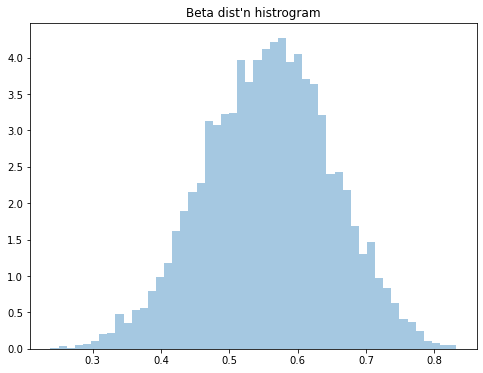

In [17]:
np.random.seed(0)
plt.figure(figsize=(8, 6))

# 베타분포 샘플링
x = sp.stats.beta(15, 12).rvs(10000)

sns.distplot(x, kde=False, norm_hist=True)
plt.title("Beta dist'n histrogram")
plt.show()

이런 분포를 활용하면 역으로 데이터의 모수 추정 방법이 유효하다는 것을 입증할 수도 있습니다.

In [14]:
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) /s2 - 1)
    return a, b

params = estimate_beta(x)
print(params)

(15.346682046700685, 12.2121537049535)


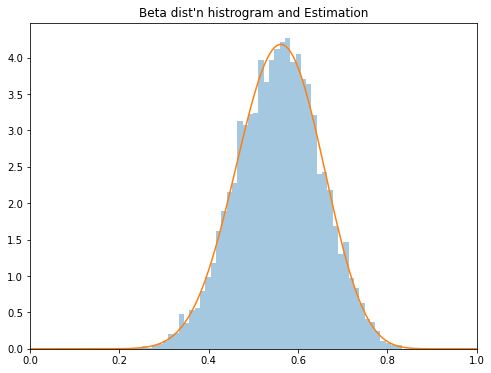

In [16]:
plt.figure(figsize=(8, 6))
xx = np.linspace(0, 1, 1000)
sns.distplot(x, kde=False, norm_hist=True)
plt.plot(xx, sp.stats.beta(params[0], params[1]).pdf(xx))
plt.xlim(0, 1)
plt.title("Beta dist'n histrogram and Estimation")
plt.show()

`scipy`에 있는 확률분포 클래스 종류는 다음과 같습니다.  
- 이산형
    - 베르누이분포 (`sp.stats.bernoulli`)
    - 이항분포 (`sp.stats.binom`)
- 연속형
    - 다향분포 (`sp.stats.multinomial`)
    - 균일분포 (`sp.stats.uniform`)
    - 정규분포 (`sp.stats.norm`)
    - 베타분포 (`sp.stats.beta`)
    - 감마분포 (`sp.stats.gamma`)
    - 스튜던트 t분포 (`sp.stats.t`)
    - 카이 제곱분포 (`sp.stats.chi2`)
    - F분포 (`sp.stats.f`)
    - 디리클레분포 (`sp.stats.dirichlet`)
    - 다변수 정규분포 (`sp.stats.multivariate_normal`)
 
각 클래스들에는 다음과 같은 메서드들이 있습니다. 대부분 각 분포들의 함수 형태와 관련된 것들입니다.

- `pmf` : 확률질량함수
- `pdf` : 확률밀도함수
- `cdf` : 누적분포함수
- `ppf` : 누적분포함수의 역함수
- `sf` : 생존함수 = 1-누적분포함수
- `isf` : 생존함수의 역함수
- `rvs` : 랜점 표본 생성

# 검정과 유의확률

**검정**은 데이터에 숨어 있는 확률변수의 분포에 대한 가설이 맞는지 틀리는지 정량적으로 증명하는 과정입니다.  
예를 들어 다음과 같은 질문이 있습니다.  

> 어떤 동전을 15번 던졌더니 12번 앞면이 나왔다. 이 동전은 조작되지 않은 공정한 동전일까?

동전은 0과 1이이 있는 베르누이분포이므로 베르누이분포 확률변수로 모형화하겠습니다.  
모수를 추정하면 $p = \frac{12}{15} = 0.8$로 공정성과는 멀어보입니다.  
근데 이것은 단순히 **추정**에 불과합니다. 정말 어쩌다가 우연하게 결과가 나올 수도 있으니까요.  
그렇다면 우리는 이 주장을 어떻게 입증할 수 있을까요?

## 가설과 검정

우리는 우선 주어진 확률분포에 대한 **가설($H$)** 을 설립해야합니다. 이 가설을 증명하는 행위를 **통계적 가설검정** 즉, 검정이라고 합니다.  
특히 모숫값이 특정값을 갖는다는 가설을 검정하는 경우 **모수 검정**이라고 합니다.

## 귀무가설과 대립가설

확률분포의 모수에 대한 가설을 **귀무가설($H_0)$** 이라고 합니다.  
귀무가설은 확률분포를 특정한 상태로 고정하므로 **반드시 등식**으로 표현해야합니다. 즉, 귀무가설은 어떤 기준점의 상태입니다.  
그렇다면 이 기준점 가설이 우리가 입증하려는 가설이면 괜찮은데, 아닌경우도 있습니다.  
우리가 이 가설을 반박하고 싶은 경우도 있는데, 이런 경우 **대립가설($H_1)$** 을 세웁니다.  
대립가설과 귀무가설을 아래처럼 표기합니다.

$$
H_0: \theta = \theta_0 \qquad H_1 : \theta \neq \theta_0 \\
H_0: \theta = \theta_0 \qquad H_1 : \theta \lt \theta_0 \\
H_0: \theta = \theta_0 \qquad  H_1 : \theta \gt \theta_0
$$

그렇다면 위에서 말한 동전문제의 검정 가설은 어떻게 세울까요?  

$$
H_0 : \mu=0.5 \qquad H_1 : \mu \neq 0.5
$$  

이를 증명하려면 이제 귀무가설이 틀렸다는 증거를 보여줘야합니다.

## 검정 통계량

귀무가설이 맞거나 틀렸다는 것을 증명하려면 어떤 증거가 있어야 합니다.  

- ‘어떤 병에 걸렸다’라는 가설을 증명하려면 환자의 혈액을 채취하여 혈액 내의 특정한 성분의 수치를 측정해야 한다고 가정하자. 이때 해당 수치가 바로 검정통계량이 된다.  
- ‘어떤 학생이 우등 상장을 받을 수 있는 우등생이다’라는 가설을 증명하려면 시험 성적을 측정하면 된다. 이 시험 성적을 검정통계량이라고 부를 수 있다.

이 증거를 담당하는 수치가 바로 **검정통계량($t$)** 이라고 합니다.  
문제는 여기서 이 검정통계량도 특정표본에서 계산된 함수이기 때문에 또 다시 확률변수의 표본이 됩니다.  
예를 들면 위의 예시로 설명해보면 성적을 통해 학생이 우등생임을 보이려면 우등생인 모든 학생의 시험 성적 분포를 보고 판단해야합니다.  
이 과정이 수식적 유도과정으로는 굉장히 어렵기 때문에 **시뮬레이션**을 활용하거나 통계학자들이 특정한 **검정통계량 확률분포**만 사용합니다.  

## 유의확률

지금까지 2가지 정보를 얻었습니다.  

- 검정통계량이 따르는 검정통계량 $t$의 확률분포 $p_{T}(x)$를 알고 있습니다. (통계학자들이 구해줌)
- 실제 데이터에 구한 검정통계량의 값 $t_0$, 즉 확률분포 $p_{T}(x)$의 표본 1개를 갖고 있습니다.

만약 우리가 설정한 귀무가설이 사실이라면 실제 데이터에서ㅓ 구한 검정통계량 값은 검정통계량 확률분포를 따르므로 기댓값 근방의 값이 나올 겁니다.  
반대로 귀무가설이 사실이 아니면 실제 데이터에서 구한 검정통계량의 값은 검정통계량에서 나오기 어려울 것입니다.

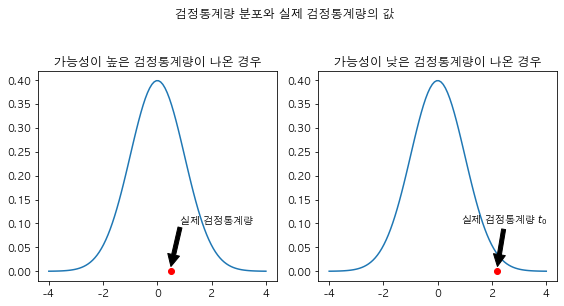

In [23]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("가능성이 높은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("가능성이 낮은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량의 값", y=1.05)
plt.tight_layout()
plt.show()

그렇다면 이렇게 나오기 쉬운 값인지 아닌지를 숫자로 판단할 수 있는 방법이 있을까요?  
그 방법이 바로 **유의확률(p-value)** 입니다.  

유의확률은 **확률분포와 확률분포의 표본값 1개가 주어졌을 때 그 확률분포에서 해당 표본값 혹은 더 희귀한 값이 나올 수 있는 확률**로 정의합니다.

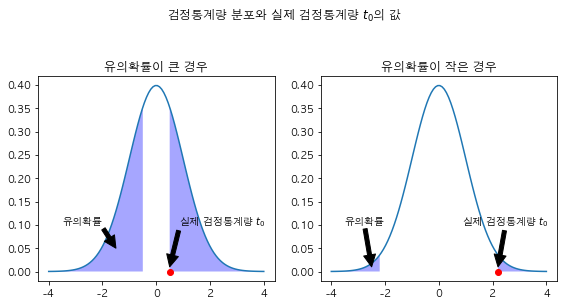

In [24]:
xx1 = np.linspace(-4, 4, 100)

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("유의확률이 큰 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -0.5, 100)
xx3 = np.linspace(0.5, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-1.5, 0.05), xytext=(-3.5, 0.1), arrowprops=black)

plt.subplot(122)
plt.title("유의확률이 작은 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -2.2, 100)
xx3 = np.linspace(2.2, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-2.5, 0.01), xytext=(-3.5, 0.1), arrowprops=black)

plt.suptitle("검정통계량 분포와 실제 검정통계량 $t_0$의 값", y=1.05)
plt.tight_layout()
plt.show()

## 유의수준과 기각역

유의확률이 아주 작다는 것은 **귀무가설이 맞다는 가정하에 현재 통계량 값이 나올 가능성이 매우 작다는 것**입니다.  
결국 **유의확률값이 아주 작으면 귀무가설을 기각하고 대립가설을 채택**할 수 있습니다.  
쉽게 말하면 귀무가설이 맞다는 가정하에 현재의 실제 결과가 나올 가능성이 없다면 귀무가설이 틀렸다는 반증이 됩니다.

문제는 여기서 말하는 **아주 작다**의 기준이 뭐냐?입니다.  
그래서 보통 기준값을 정하는데 이를 **유의수준**이라 하고 1%, 5%, 10%선에서 결정합니다.  

> 유의확률이 유의수준보다 작으면 귀무가설을 기각하고 대립가설을 채택한다.

## 실제 예시 : 동전의 공정성 분석

자 대충 이론적인 내용을 봤으니 위의 동전예시에 적용해봅시다.  

우선 $H_0 : \mu = 0.5$ 입니다.  
여기서 우리는 동전이 공정하지 않다는 것을 보이고 싶으니까 $H_1 : \mu \neq 0.5$로 설정합시다.

우리의 동전은 0.8의 확률을 갖고 있었습니다.

In [27]:
sp.stats.binom_test(12, 15)

0.035156250000000014

귀무가설 0.5 가정하에 15번 수행 중 12번의 1이 나오면 p-value는 0.035가 나옵니다.  
이 경우 유의확률 5%로 볼 경우 $0.05 > \text{p-value}$이므로 귀무가설이 기각되고 해당 동전은 공정하지 못합니다.

# `scipy`를 통한 검정법

그렇다면 이제 `scipy`를 통해 다양한 분포 검정을 해봅시다. 종류는 다음과 같이 있습니다.  

## 이항검정 

```python
scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sides')
```
- `x` : 1이 나온 횟수
- `n` : 총 시도 횟수
- `p` : 귀무가설의 $\mu$ 값
- `alternative` : 양측검정은 'two-sided', 단측검정이면 'less' 또는 'greater'

이항검정은 이항분포를 활용하여 베르누이 확률변수의 모수 $\mu$에 대한 가설을 조사하는 방법입니다.

In [28]:
sp.stats.binom_test(12, 15)

0.035156250000000014

## 카이제곱검정 

```python
scipy.stats.chisquare(f_obs, f_exp=None)
```
- `f_obs` : 데이터 행렬
- `f_exp` : 기댓값 행렬

카이제곱검정은 범주형 확률분포에 대한 검정을 할때 사용합니다. **적합도검정**이라고도 합니다.  
전반적으로 범주형 자료를 담다보니 입력 parameter는 행렬값으로 가져옵니다. 하지만 각 값은 이항검정 케이스와 유사합니다.

데이터 개수 N=10, 귀무가설 모수 $\mu_0 = (0.25, 0.25, 0.25, 0.25)$ 이고 실제 데이터는 (0, 3, 5, 2)인 경우에 대해 검정을 해봅시다.

In [29]:
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [34]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

## 카이제곱 독립성검정

```python
scipy.stats.chi2_contingency(table)
```

두 범주형 변수의 상관관계를 분석할 때 사용합니다.  
보통 두 변수가 독립인지 아닌지를 확인할 때 많이 사용합니다.

In [35]:
obs = np.array([[5, 15], [10, 20]])
obs

array([[ 5, 15],
       [10, 20]])

In [40]:
sp.stats.chi2_contingency(obs)[0], sp.stats.chi2_contingency(obs)[1] # cor, p-value

(0.0992063492063492, 0.7527841326498471)

In [43]:
# Create contingency table 
OD = pd.DataFrame({'notObese': [173, 259],
                   'Obese' : [27, 61]},index ={'nonDiabetic','Diabetic'})
OD

,notObese,Obese
Diabetic,173,27
nonDiabetic,259,61


In [45]:
# chi-square test
chiRes = sp.stats.chi2_contingency(OD)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 2.3274739583333344
p-value: 0.12710799319896815
degree of freedom: 1
expected contingency table
[[166.15384615  33.84615385]
 [265.84615385  54.15384615]]


In [46]:
# Create the contigency table
GE = pd.DataFrame({'Blue' :[370, 359],
                   'Brown':[352, 290],
                   'Green':[198, 110],
                   'Hazel':[187, 169]},index={'Female','Male'})
GE

,Blue,Brown,Green,Hazel
Male,370,352,198,187
Female,359,290,110,169


In [48]:
# chi-square test
chiRes2 = sp.stats.chi2_contingency(GE)
# Details
print(f'chi-square statistic: {chiRes2[0]}')
print(f'p-value: {chiRes2[1]}')
print(f'degree of freedom: {chiRes2[2]}')
print('expected contingency table') 
print(chiRes2[3])

chi-square statistic: 16.589883392436516
p-value: 0.0008581329522990205
degree of freedom: 3
expected contingency table
[[396.56167076 349.23538084 167.54594595 193.65700246]
 [332.43832924 292.76461916 140.45405405 162.34299754]]


## 점 양분 상관계수 (point-biserial correlation)

두 범주형 변수의 상관성은 카이제곱 독립성 검정을 통해 알 수 있습니다.  
그렇다면 연령과 범주형 변수처럼 연속형 변수와 범주형 변수의 상관관계는 어떻게 알 수 있을까요?  

```python
scipy.stats.pointbiserialr(X, y)
```

In [50]:
import random
# initialize random number generator
random.seed(36)
# Assume y is studied (1)/ not studied (0) 
# X is the test score, max 20 marks
y = [random.randint(0, 1) for num in range(0, 10)]
print(f'y values: {y}')
X = []
for i in y:
    if i != 0:
        ele = random.randint(11, 20)        
    else:
        ele = random.randint(1, 10) # 1-10 not studied
    X.append(ele)
print(f'X values: {X}')

y values: [1, 0, 0, 1, 0, 0, 0, 0, 1, 1]
X values: [16, 9, 5, 19, 2, 10, 7, 8, 17, 16]


In [52]:
# point-biserial correlation
# output is a tuple
result = sp.stats.pointbiserialr(X, y)
print(f'correlation between X and y: {result[0]:.2f}')
print(f'p-value: {result[1]:.2g}')

correlation between X and y: 0.91
p-value: 0.00021


# References

- 김도영의 데이터사이언스 스쿨 : 9.4 검정과 유의확률, [https://datascienceschool.net/02%20mathematics/09.04%20검정과%20유의확률.html](https://datascienceschool.net/02%20mathematics/09.04%20검정과%20유의확률.html)
- 김도영의 데이터사이언스 스쿨 : 9.5 사이파이를 사용한 검정, [https://datascienceschool.net/02%20mathematics/09.05%20사이파이를%20사용한%20검정.html#](https://datascienceschool.net/02%20mathematics/09.05%20사이파이를%20사용한%20검정.html#)
- Navigating Statistical Tests [https://towardsdatascience.com/levels-of-measurement-statistics-and-python-implementations-8ff8e7867d0b](https://towardsdatascience.com/levels-of-measurement-statistics-and-python-implementations-8ff8e7867d0b)